<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/02-Machine-Learning/notebooks/09-Decision-Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

En esta notebook usaremos el clasificador [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn.

Primero, observaremos algunas caracteristicas generales del método y después, lo usaremos en un problema de clasificación con un dataset clásico del machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo 1: Un ejemplo para explorar las características del clasificador DT

## 1. Datos linealmente separables con una línea horizontal

En este primer ejemplo generamos un conjunto de datos linealmente separables con `make_blobs`. Estos datos pueden ser separados con una línea vértical, es decir con una condición de tipo

* Si $x>\alpha$ entonces $(x,y)\in\text{clase}_0$.
* Si $x<\alpha$ entonces $(x,y)\in\text{clase}_1$.

Primero, generamos y visualizamos los datos

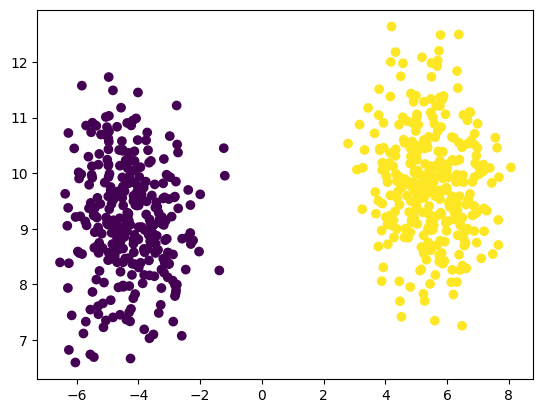

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=600,centers=2,random_state=31)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Dividimos los datos en *train/test*. Entrenamos el árbol de decisión usando la implementación de scikit-learn `sklearn.tree.DecisionTreeClassifier`. Realizamos la predicción sobre el conjunto de prueba.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Inicializar el modelo
clf = clf.fit(X_train,y_train)  # Entrenar el modelo
y_pred = clf.predict(X_test)    # Predecir las etiquetas para el conjunto de prueba

Como es de esperar, obtenemos el 100% en todas las métricas

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


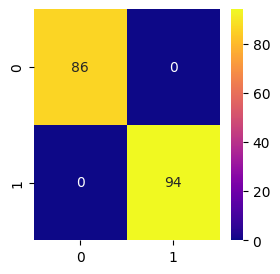

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True)
plt.show()

Veamos el árbol de decisión usando el módulo `tree` de scikit-learn.

In [5]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_0 <= 0.80
|   |--- class: 0
|--- feature_0 >  0.80
|   |--- class: 1



Visualizamos la *frontera de decisión* usando `dtreeviz`. Esta es una biblioteca python para la visualización de árboles de decisión y la interpretación de modelos ([documentación](https://github.com/parrt/dtreeviz)).

In [6]:
!pip install -qq dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.9 MB/s eta 0:00:00


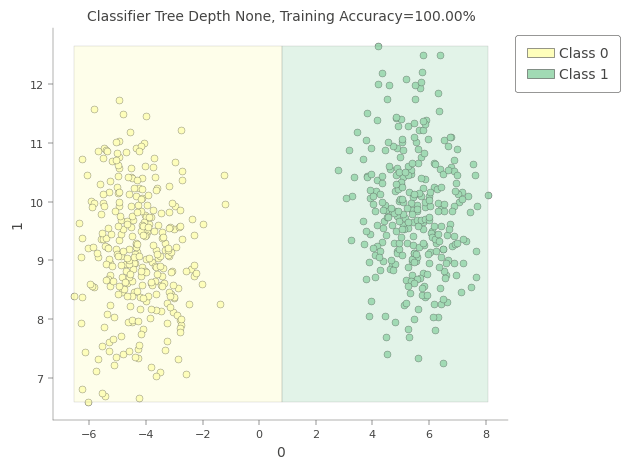

In [7]:
# from dtreeviz.trees import ctreeviz_bivar
from dtreeviz import model

# ct = ctreeviz_bivar(clf, X, y, feature_names = ['0','1'],fontname='DejaVu Sans')
ct = model(clf, X, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')

plt.tight_layout()
plt.show()

## Datos linealmente separables con una línea con pendiente $m\neq 0$.

Transformamos los datos para ahora sean separables con línea no horizontal. Para esto, rotamos cada punto un ángulo $\theta=\frac{\pi}{4}=45°$; esto lo hacemos multiplicando por la matriz de rotación:

$$R=\left(\begin{array}{cc}\cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) \\
\sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4})\end{array}\right)$$

<br>

$$X_r = (R\cdot X^T)^T$$

Después trasladamos la clase *amarilla* con el vector $z=(-1,-2)$.


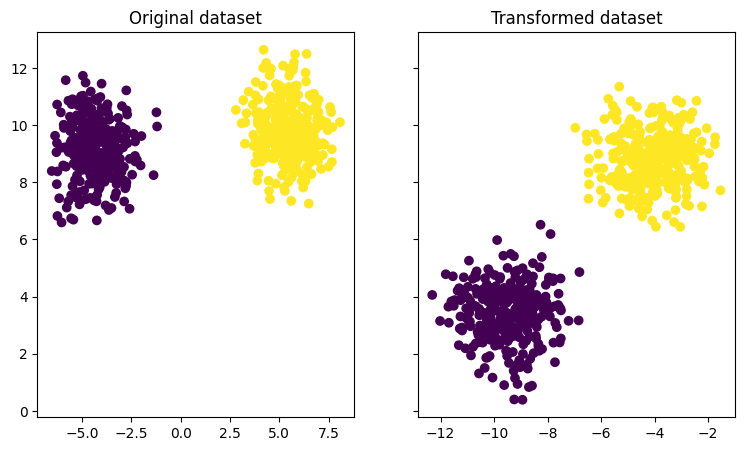

In [8]:
import numpy as np

theta = np.pi/4 # Ángulo de rotación
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # Matriz de rotación

Xr = np.transpose(R@np.transpose(X)) # Rotamos el dataset

idxs = np.where(y==1)[0]   # Obtenemos los índices donde y=1

Xr[idxs,:] = Xr[idxs,:] + np.array([-1,-2])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xr[:,0],Xr[:,1],c=y)
axs[1].set_title("Transformed dataset")
fig.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Dados que los datos siguen siendo linealmente separables, seguimos obteniendo el 100% en todas las métricas.

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


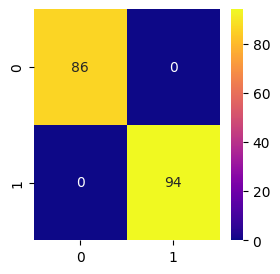

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Sin embargo, el árbol empieza a hacerse más complejo.

In [11]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.32
|   |--- class: 0
|--- feature_1 >  6.32
|   |--- feature_0 <= -7.61
|   |   |--- class: 0
|   |--- feature_0 >  -7.61
|   |   |--- class: 1



La frontera de decisión no es la que esperaríamos:

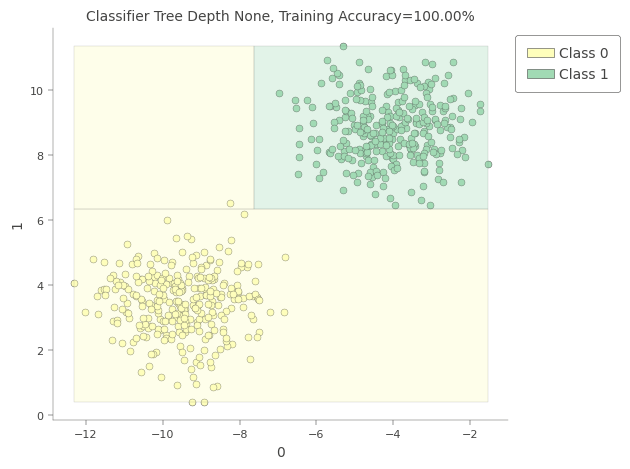

In [12]:
from dtreeviz import model

ct = model(clf, Xr, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

Como podemos ver, este clasificador no separa con una línea en general, aún si los datos son linealmente separables. Separa con una FD compuesta de segmentos de línea verticales y horizontales.

## Efecto de perturbaciones

Ahora, observemos el efecto de perturbar levemente el conjunto de datos. ¿Qué le pasa al arbol de decisión?

Movemos un par de puntos cerca de la FD.

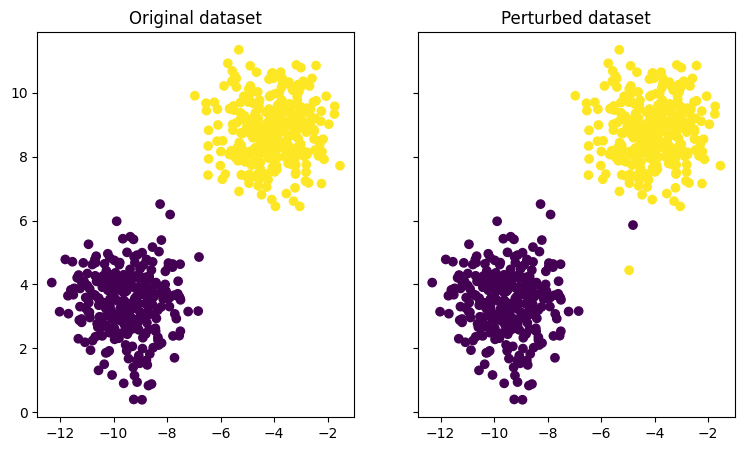

In [13]:
Xrp = Xr.copy()
Xrp[192] = Xrp[192] + np.array([-1,-2])
Xrp[486] = Xrp[486] + np.array([2,1])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(Xr[:,0],Xr[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xrp[:,0],Xrp[:,1],c=y)
axs[1].set_title("Perturbed dataset")
fig.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xrp, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.994
Recall: 0.98936
Precision: 1.0


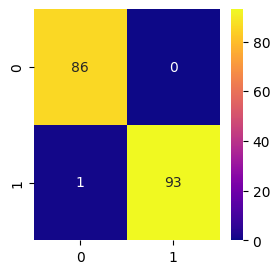

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [16]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.59
|   |--- feature_0 <= -5.90
|   |   |--- class: 0
|   |--- feature_0 >  -5.90
|   |   |--- feature_0 <= -4.88
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -4.88
|   |   |   |--- class: 0
|--- feature_1 >  6.59
|   |--- class: 1



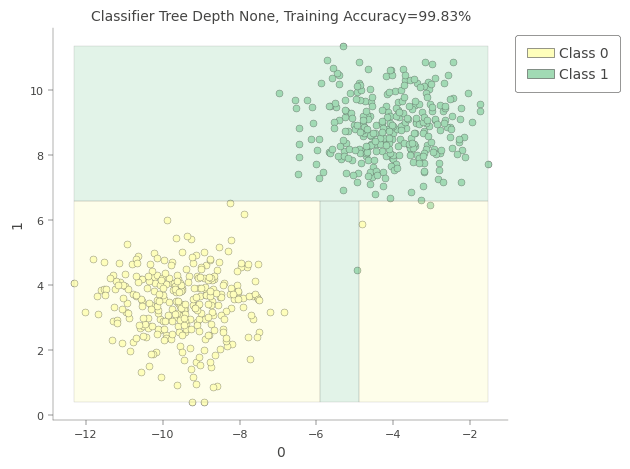

In [17]:
from dtreeviz import model

ct = model(clf, Xrp, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

# Ejemplo 2

## 1. El conjunto de datos

Este dataset fue creado por el *National Institute of Diabetes and Digestive and Kidney Diseases* de Estados Unidos. El objetivo del dataset es predecir el diagnostico de cuándo un paciente tiene diabetes o no, basado en ciertas mediciones incluidas en el dataset. Varias restricciones fueron usadas en la selección de estas instancias para filtrar el dataset. En particular, se trata pacientes femeninas de al menos 21 años de edad pertenecientes al grupo indígena Pima de Arizona.

Las variables incluidas son el numero de embarazos la paciente ha tenido, su BMI, nivel de insulina, edad, entre otras.

El dataset se encuentra en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

In [24]:
import pandas as pd

url = 'https://raw.githubusercontent.com/weduardogs/DCDCP/main/02-Machine-Learning/data/diabetes.csv'
df = pd.read_csv(url)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Entrenar el clasificador y resultados

Escogemos las *features* que usaremos y definimos el dataset de features y el vector de etiquetas

In [25]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','SkinThickness']

X = df[feature_cols].values    # Features
y = df['Outcome'].values         # Target variable

Dividimos los datos en train/test. Entrenamos el árbol de decisión usando la implementación de scikit-learn sklearn.tree.DecisionTreeClassifier. Realizamos la predicción sobre el conjunto de prueba.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.71
Recall: 0.6
Precision: 0.607


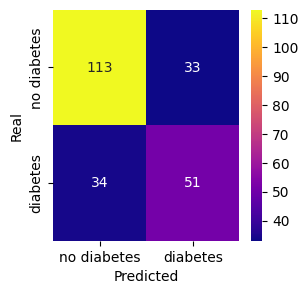

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Podemos obtener la importancia de las features

In [28]:
clf.feature_importances_

array([0.06317993, 0.06235767, 0.27195357, 0.14478663, 0.28833153,
       0.14626719, 0.02312347])

In [29]:
importances_df = pd.DataFrame({'feature':feature_cols,'importancia':np.round(clf.feature_importances_,3)})
importances_df.sort_values(by='importancia',ascending=False,inplace=True)
importances_df.set_index('feature')

importancia
feature                   
Glucose              0.288
BMI                  0.272
BloodPressure        0.146
Age                  0.145
Pregnancies          0.063
Insulin              0.062
SkinThickness        0.023

## Predecir datos ramdom

In [39]:
# Select a random row
random_row = df.sample(n=1, random_state=None)

# Create X_random using only the columns in feature_cols
X_random = random_row[feature_cols].values  # Use .values to match X_train's format
y_actual = random_row['Outcome'].values[0]  # Actual outcome

In [40]:
# Predict using the trained classifier
y_pred_random = clf.predict(X_random)

# Print results
print("Random Row Features:")
print(pd.DataFrame(X_random, columns=feature_cols))  # Display as DataFrame for clarity
print("\nActual Outcome:", y_actual)
print("Predicted Outcome:", y_pred_random[0])

Random Row Features:
   Pregnancies  Insulin   BMI   Age  Glucose  BloodPressure  SkinThickness
0          0.0      0.0  21.9  25.0    101.0           62.0            0.0

Actual Outcome: 0
Predicted Outcome: 0


In [42]:
# Example synthetic row (adjust values based on feature_cols and their ranges)
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
synthetic_data = {
    'Pregnancies': 0,
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 100,
    'BMI': 32.5,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 40
}

# Convert to DataFrame and select only feature_cols
synthetic_row = pd.DataFrame([synthetic_data])[feature_cols]
X_synthetic = synthetic_row.values  # Convert to NumPy array

# Predict
y_pred_synthetic = clf.predict(X_synthetic)

# Print results
print("Synthetic Row Features:")
print(synthetic_row)
print("\nPredicted Outcome:", y_pred_synthetic[0])

Synthetic Row Features:
   Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  SkinThickness
0            0      100  32.5   40      120             70             30

Predicted Outcome: 1


## Visualizar el árbol

### Text representation with sklearn

In [30]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf,
                                       feature_names=feature_cols)
print(text_representation)

|--- Glucose <= 129.50
|   |--- BMI <= 26.30
|   |   |--- BMI <= 9.10
|   |   |   |--- Age <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  28.00
|   |   |   |   |--- class: 1
|   |   |--- BMI >  9.10
|   |   |   |--- Insulin <= 47.00
|   |   |   |   |--- class: 0
|   |   |   |--- Insulin >  47.00
|   |   |   |   |--- Insulin <= 48.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Insulin >  48.50
|   |   |   |   |   |--- class: 0
|   |--- BMI >  26.30
|   |   |--- Age <= 27.50
|   |   |   |--- BMI <= 45.40
|   |   |   |   |--- Pregnancies <= 7.00
|   |   |   |   |   |--- BloodPressure <= 12.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BloodPressure >  12.00
|   |   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  22.50
|   |   |   |   |   |   |   |--- BMI <= 30.45
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- BMI >  30.45
|   |   |   |   |   |   | 

In [31]:
with open("decistion_tree_textrep.log", "w") as txt_file:
    txt_file.write(text_representation)

### Plot tree with sklearn

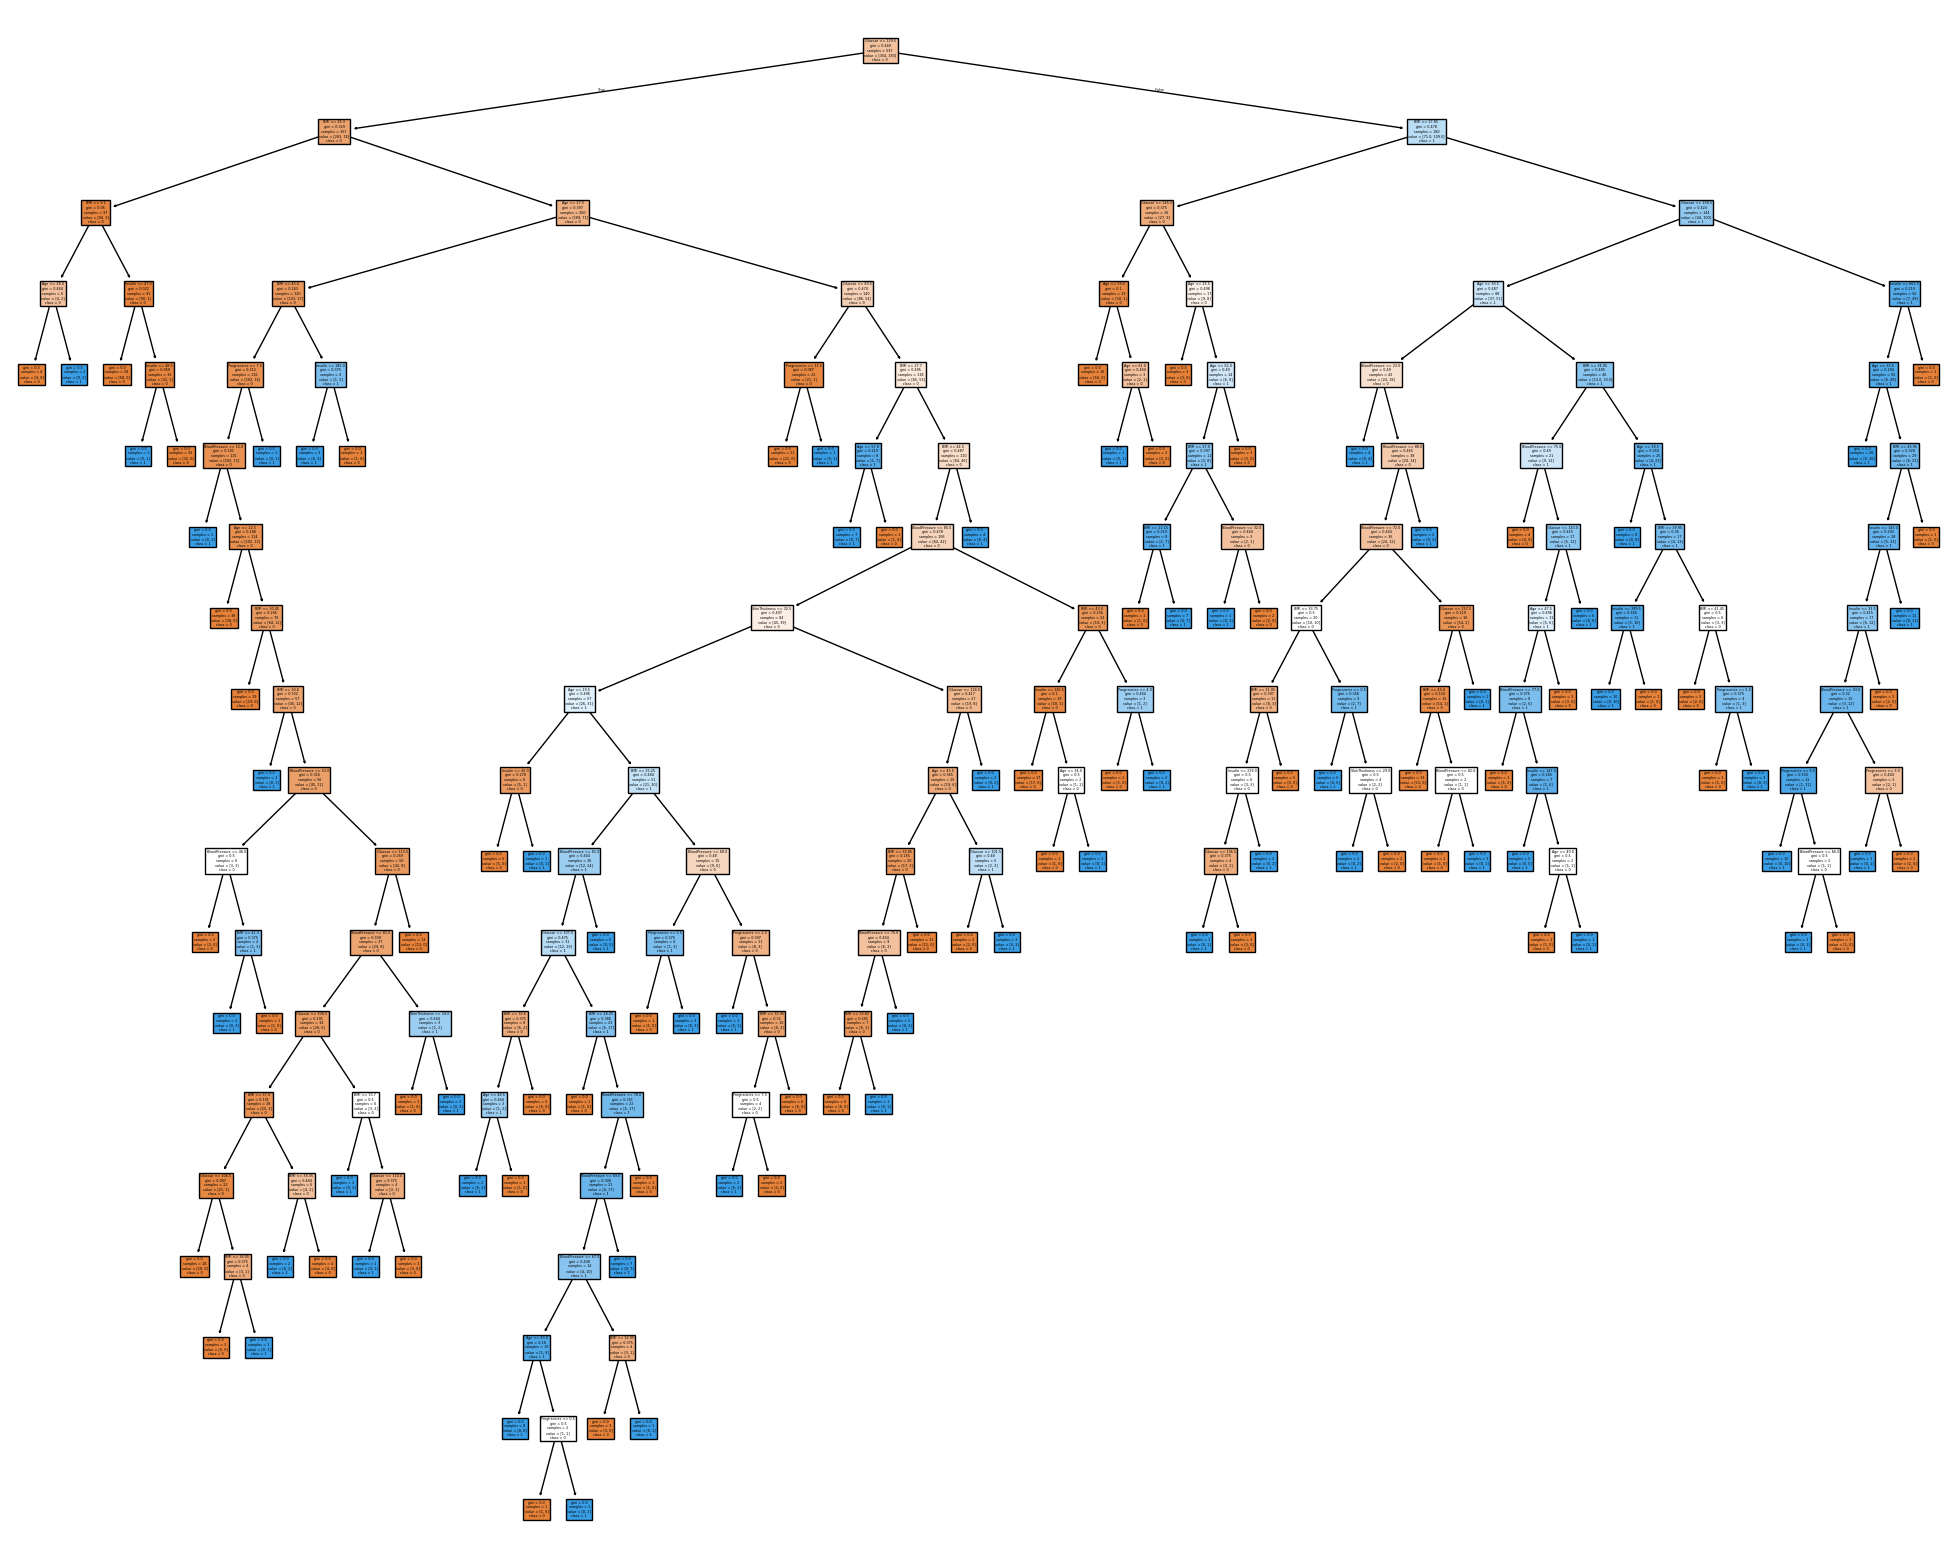

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_cols,
                   class_names=['0','1'],
                   filled=True)


### Using [graphviz](https://graphviz.org/)

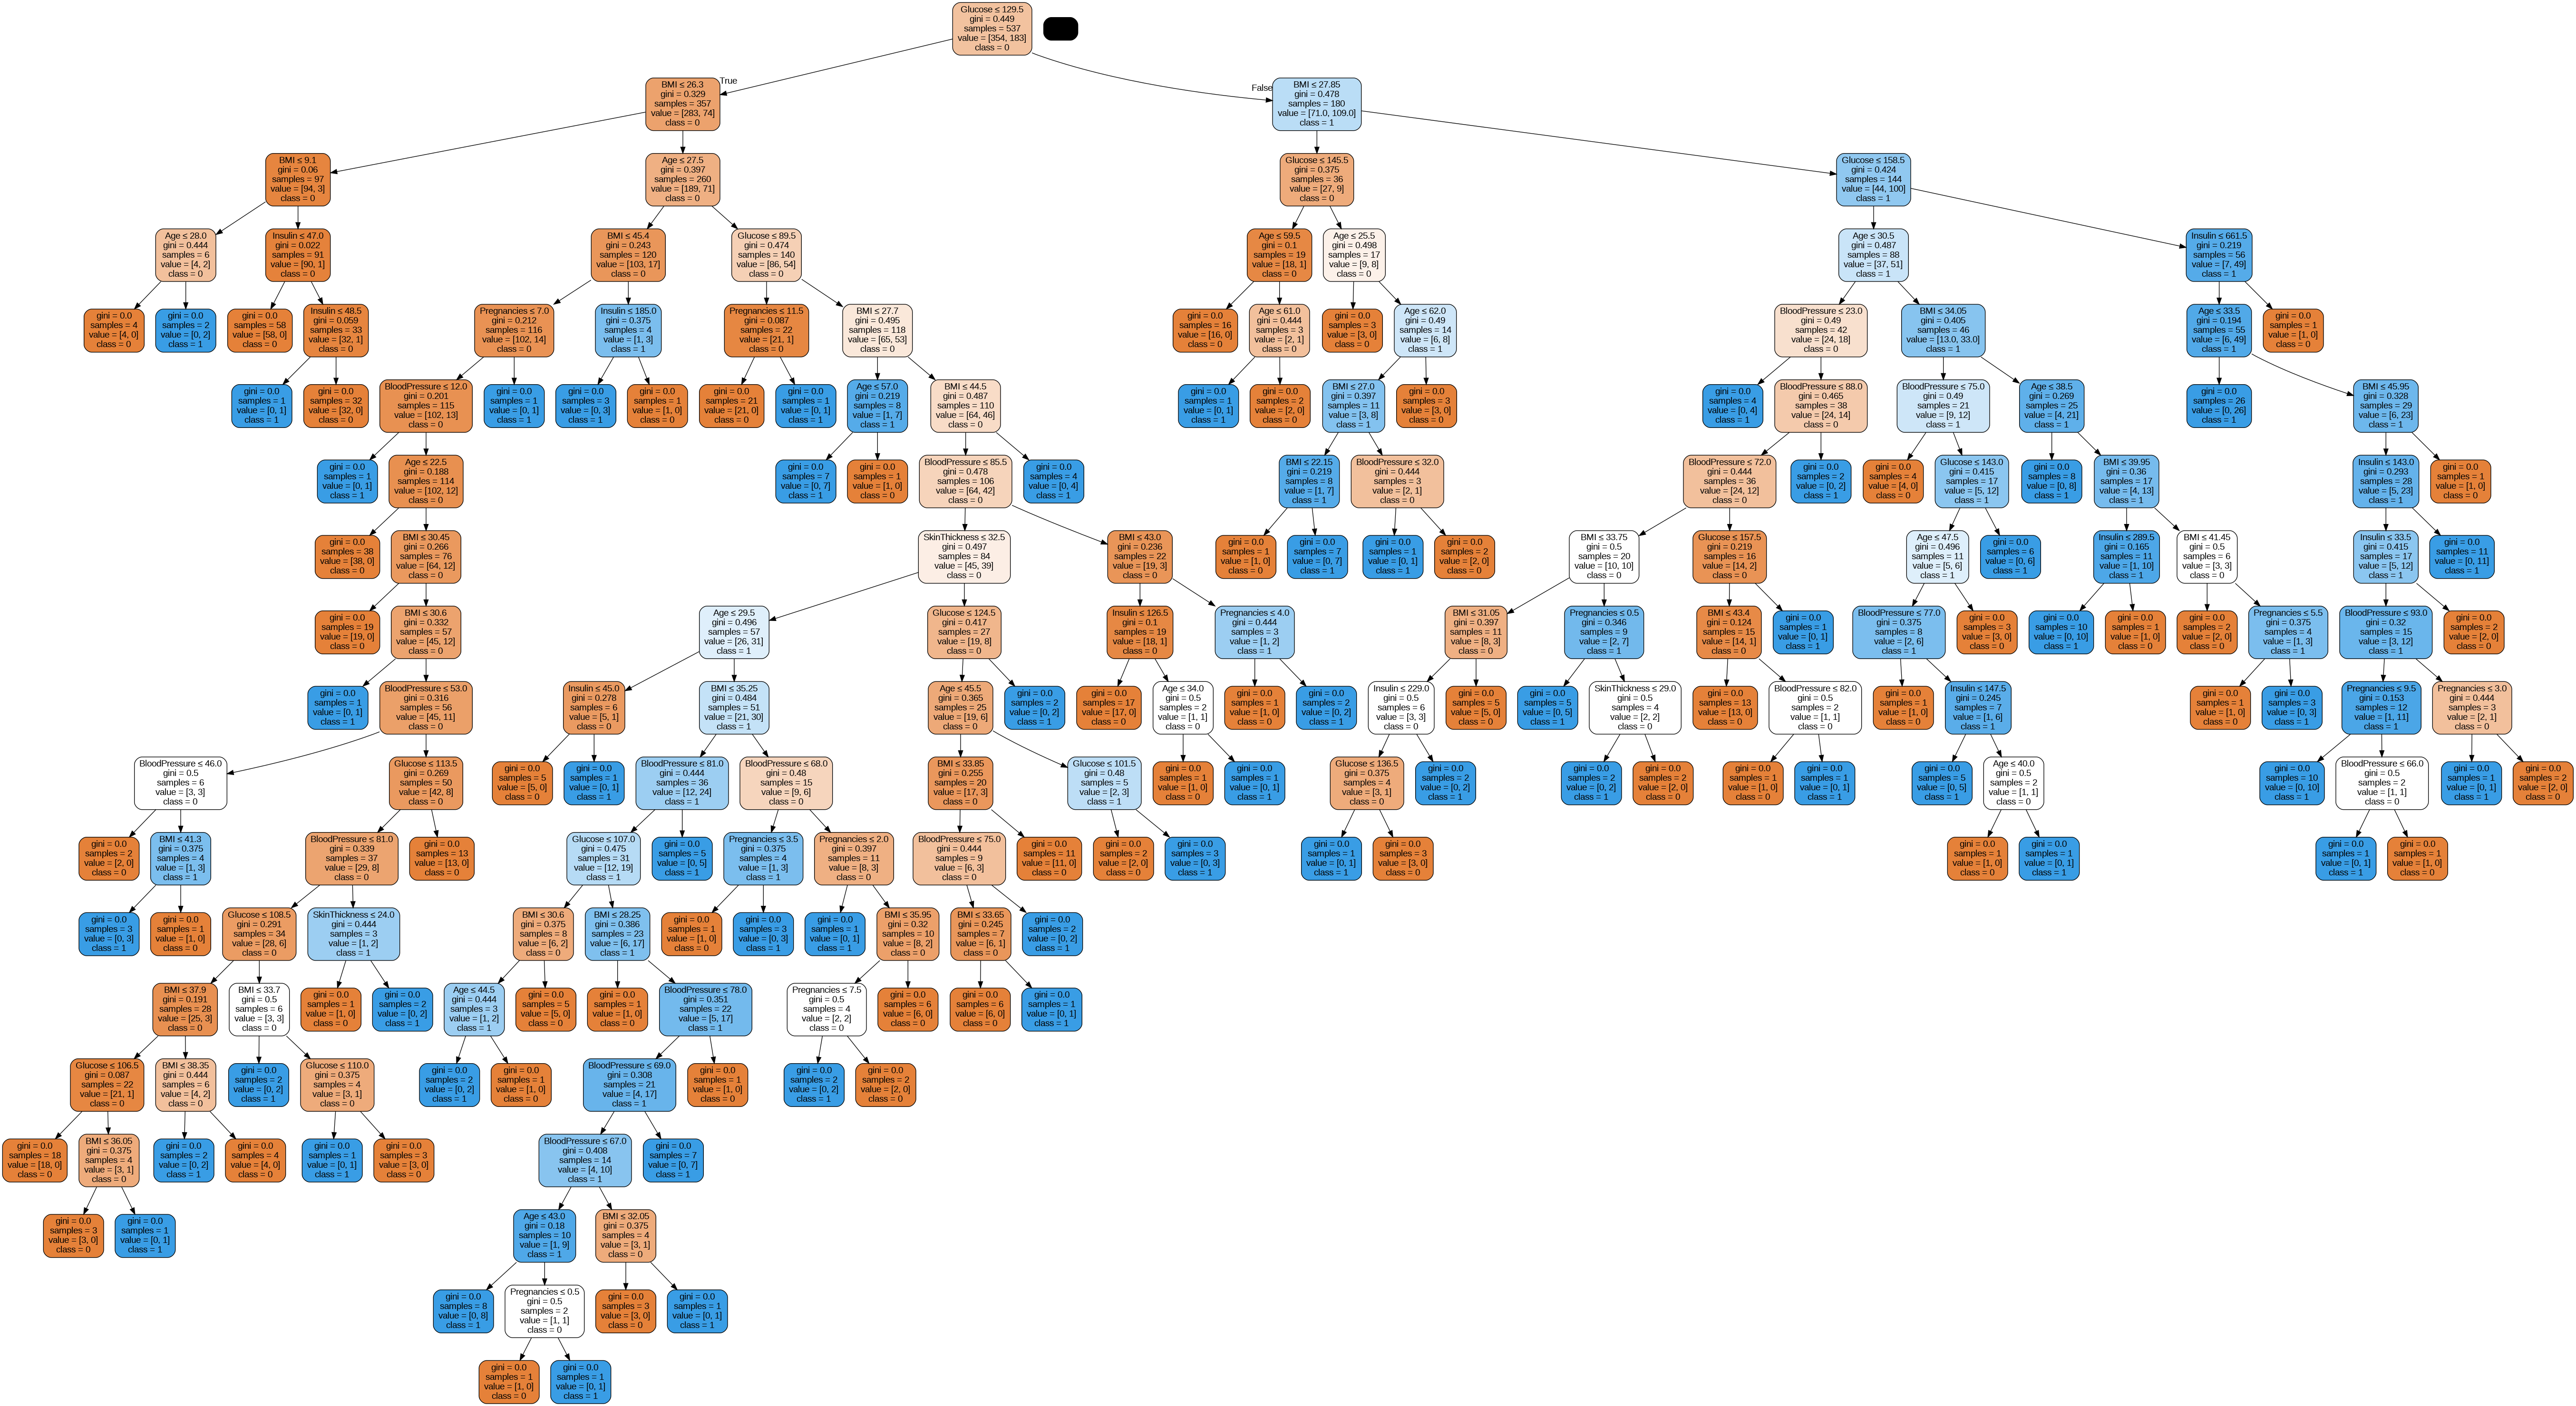

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### Plot tree with [dtreeviz](https://github.com/parrt/dtreeviz)

In [34]:
from dtreeviz import model

ct = model(clf, X, y, feature_names = feature_cols)
ct.view(fontname='DejaVu Sans')

Podemos ver el proceso de visualización con una instancia concreta.

In [ ]:
x = X[0]

ct.view(fontname='DejaVu Sans',
        x=x,
        orientation="LR")

⭕ **Práctica**:

¿Puedes subir las métricas de desempeño de este clasificador en este dataset? Considera las siguientes modificaciones:

* Observar la variable 'bmi', tiene valores 0, ¿qué sentido tienen estos?
    * Puedes quitar esas instancias.
    * Puedes quitar la variable.
* Cambiar el conjunto de features, ya sea manualmente o con algún método como [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold), [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), etc.
* Normalizar o estadarizar los datos.
* Realizar un gridsearch en los parámetros del clasificador.